In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

In [88]:
data = pd.read_csv("./datasets/Breast_cancer_data.csv")
data.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [89]:
x = data[["mean_radius", "mean_texture", "mean_area"]]
y = data.diagnosis

In [90]:
x = np.array(x)
y = np.array(y)

In [91]:
print(x.shape)
y = y.reshape((y.shape[0], 1))
print(y.shape)

(569, 3)
(569, 1)


In [92]:
from plotly import express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2])
fig.show()

In [93]:
x = (x - x.mean()) / x.std()

In [94]:
x[:5, ]

array([[-0.58258292, -0.6035503 ,  2.12584665],
       [-0.57547439, -0.58318907,  3.02130002],
       [-0.57789901, -0.57360083,  2.68240536],
       [-0.60068485, -0.57599789,  0.43164889],
       [-0.57624586, -0.59263955,  2.94139802]])

In [95]:
X = np.hstack((x, np.ones((x.shape[0], 1))))

In [96]:
X[:5, ]

array([[-0.58258292, -0.6035503 ,  2.12584665,  1.        ],
       [-0.57547439, -0.58318907,  3.02130002,  1.        ],
       [-0.57789901, -0.57360083,  2.68240536,  1.        ],
       [-0.60068485, -0.57599789,  0.43164889,  1.        ],
       [-0.57624586, -0.59263955,  2.94139802,  1.        ]])

In [97]:
theta = np.random.randn(X.shape[1], 1)
theta

array([[1.08807177],
       [0.30290618],
       [0.87508648],
       [1.30852414]])

## Modèle

In [98]:
def model(X_, theta_):
    return X_.dot(theta_)

In [99]:
model(X, theta)[:5, ]

array([[2.35211267],
       [3.14961393],
       [2.85331798],
       [0.8581927 ],
       [3.07599076]])

# Fonction coût

In [100]:
def logistic_function(model_):
    return 1 / (1 + np.exp(-model_))

In [107]:
def cost_function(X_, theta_, y_):
    m = len(y_)
    Y_ = logistic_function(model(X_, theta_))
    return (1/m) * np.sum( (-y_ * np.log(Y_)) - ((1-y_) * np.log(1-Y_)) )

In [108]:
cost_function(X, theta, y)

np.float64(1.1008604368644392)

# Gradient & Descente de gradient

In [109]:
def grad(X_, theta_, y_):
    m = len(y_)
    Y_ = logistic_function(model(X_, theta_))
    return (1/m) * X_.transpose().dot(Y_ - y_)

In [110]:
def descent_grad(X_, theta_, y_, learning_rate, n_iterations):
    cost_history_ = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta_ = theta_ - (learning_rate * grad(X_, theta_, y_))
        cost_history_[i] = cost_function(X_, theta_, y_)
    return theta_, cost_history_

# Entrainement du modèle

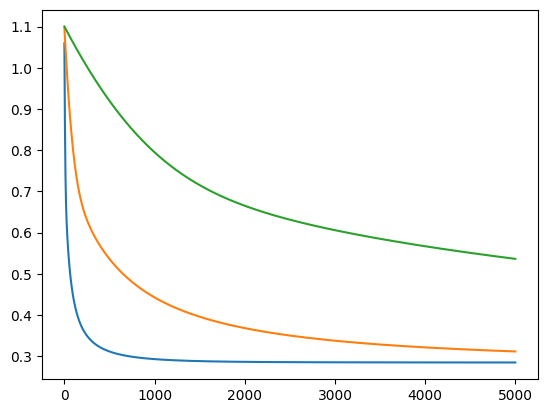

In [118]:
for lr in [0.1, 0.01, 0.001]:
    _, cost_history = descent_grad(X, theta, y, learning_rate=lr, n_iterations=5000)
    plt.plot(range(5000), cost_history)
plt.show()

In [120]:
theta_final, _ = descent_grad(X, theta, y, learning_rate=0.01, n_iterations=1000)
theta_final

array([[ 0.74904448],
       [-0.02313272],
       [-0.99048133],
       [ 1.83641368]])

In [152]:
predictions = logistic_function(model(X, theta_final))
predictions[:5, ]

array([[0.33367357],
       [0.1716906 ],
       [0.22442522],
       [0.72556938],
       [0.18318582]])

In [153]:
def decision(value):
    if value >= 0.5:
        return 1
    if value < 0.5:
        return 0

In [154]:
predictions.shape

(569, 1)

In [155]:
predictions = np.hstack((predictions, np.zeros(predictions.shape)))

In [156]:
predictions[:5, ]

array([[0.33367357, 0.        ],
       [0.1716906 , 0.        ],
       [0.22442522, 0.        ],
       [0.72556938, 0.        ],
       [0.18318582, 0.        ]])

In [157]:
for i in range(predictions.shape[0]):
    predictions[i, 1] = decision(predictions[i, 0])

In [159]:
predictions

array([[0.33367357, 0.        ],
       [0.1716906 , 0.        ],
       [0.22442522, 0.        ],
       ...,
       [0.42418003, 0.        ],
       [0.19656585, 0.        ],
       [0.82115033, 1.        ]], shape=(569, 2))

In [164]:
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], color=predictions[:, 1], labels={'x':'x1','y':'x2','z':'x3'})
fig.show()